In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#Question 1

set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2
10.225640,Site 2


In [3]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

In [4]:
tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

In [ ]:
#Question 2

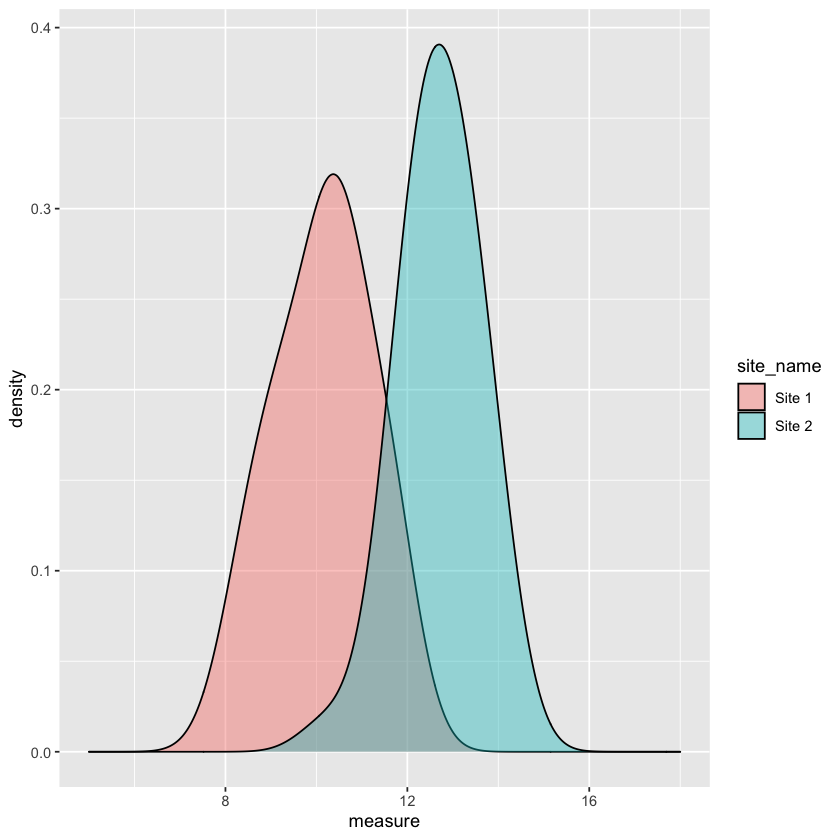

In [18]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)

ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)

In [12]:
passes_t_test = replicate(10000, 
    t.test(rnorm(40, 10, 1), rnorm(40, 13, 1))$p.value
)  < 0.05

sum(passes_t_test) / length(passes_t_test)

[1] 1

### 100% of the tests have a p-value less than 0.05

In [34]:
#Question 3

kind = c('P. lobata', 'P. lobata', 'M. capitata', 'M. capitata', 'P. mendrina', 'P. mendrina')
ratios = c(0.6, 0.61, 0.19, 0.19, 0.21, 0.20)
site = rep(c("Site X", "Site Y"), 3)

coral_proportions = tibble(kind, ratios, site)
coral_proportions

kind,ratios,site
P. lobata,0.60,Site X
P. lobata,0.61,Site Y
M. capitata,0.19,Site X
M. capitata,0.19,Site Y
P. mendrina,0.21,Site X
P. mendrina,0.20,Site Y


In [36]:
subtract_abs = function(x){
    abs(x[1] - x[2])
}

sampleOneIteration = function(){
    true_proportions = c(0.60, 0.19, 0.21)
    sample_proportions = rmultinom(1, 200, prob=c(0.61, 0.19, 0.20))/200
    sample_tvd = sum(abs(true_proportions- sample_proportions))/2
    sample_tvd
        
}

tvds = replicate(1000, sampleOneIteration())
observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$kind, subtract_abs))/2

p_value = sum(tvds > observed_stat)  / length(tvds)
p_value

[1] 0.951

### 95.1% chance that test stat would come out more extreme than observed stat. Thus not statistically significant.